In [1]:
pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

# Baca dataset
customer_data = pd.read_csv('Case-Study-Customer.csv')
store_data = pd.read_csv('Case-Study-Store.csv')
product_data = pd.read_csv('Case-Study-Product.csv')
transaction_data = pd.read_csv('Case-Study-Transaction.csv')

In [3]:
customer_data.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
store_data.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [5]:
product_data.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [6]:
transaction_data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [7]:
customer_data.tail()

,CustomerID,Age,Gender,Marital Status,Income
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"
446,447,54,1,Married,"20,37"


In [8]:
store_data.tail()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"
10,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
11,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
12,13,Buana,Buana,General Trade,"-1,26916","116,825264"
13,14,Priangan,Priangan,Modern Trade,"-5,45","105,26667"


In [9]:
product_data.tail()

,ProductID,Product Name,Price
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [10]:
transaction_data.tail()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13
5019,TR85684,55,31/12/2022,P8,16000,1,16000,6


In [11]:
customer_data.describe()

,CustomerID,Age,Gender
count,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613
std,129.182042,12.848719,0.498842
min,1.000000,0.000000,0.000000
25%,112.500000,30.000000,0.000000
50%,224.000000,39.000000,0.000000
75%,335.500000,50.500000,1.000000
max,447.000000,72.000000,1.000000


In [12]:
store_data.describe()

,StoreID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [13]:
product_data.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [14]:
transaction_data.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [15]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [16]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [17]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [18]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [19]:
customer_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Marital Status', 'Income'], dtype='object')

In [20]:
store_data.columns

Index(['StoreID', 'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude'], dtype='object')

In [21]:
product_data.columns

Index(['ProductID', 'Product Name', 'Price'], dtype='object')

In [22]:
transaction_data.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price', 'Qty',
       'TotalAmount', 'StoreID'],
      dtype='object')

In [23]:
#DATA CLEANING

customer_data.isnull()

,CustomerID,Age,Gender,Marital Status,Income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
442,False,False,False,True,False
443,False,False,False,False,False
444,False,False,False,False,False
445,False,False,False,False,False


In [24]:
customer_data.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [25]:
mode_marital = customer_data['Marital Status'].mode()[0]
customer_data['Marital Status'] = customer_data['Marital Status'].fillna(mode_marital)

In [26]:
customer_data.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [27]:
store_data.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [28]:
product_data.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [29]:
transaction_data.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [30]:
# Gabungkan dataset-store, dataset-customer, dataset-product, dan dataset-transaction

merged_data = transaction_data.merge(store_data, on='StoreID')
merged_data = merged_data.merge(customer_data, on='CustomerID')
merged_data = merged_data.merge(product_data, on='ProductID')

In [31]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [32]:
# Contoh: Membuat dataset baru untuk regresi
regression_data = merged_data.groupby('Date')['Qty'].sum().reset_index()

In [33]:
merged_data

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53",Crackers,7500
1,TR93280,287,2022-05-07,P3,7500,3,22500,7,Buana Indah,Buana,General Trade,"3,316694","114,590111",36,0,Single,"3,7",Crackers,7500
2,TR24817,287,2022-12-01,P3,7500,1,7500,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753",36,0,Single,"3,7",Crackers,7500
3,TR6865,233,2022-08-16,P3,7500,5,37500,7,Buana Indah,Buana,General Trade,"3,316694","114,590111",43,1,Married,"5,69",Crackers,7500
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",33,1,Married,"9,94",Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR29921,228,2022-11-02,P6,18000,2,36000,7,Buana Indah,Buana,General Trade,"3,316694","114,590111",46,0,Married,"11,31",Cashew,18000
5016,TR22734,228,2022-04-20,P6,18000,4,72000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",46,0,Married,"11,31",Cashew,18000
5017,TR99324,292,2022-08-27,P6,18000,3,54000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",31,0,Single,"9,57",Cashew,18000
5018,TR2963,113,2022-02-06,P6,18000,4,72000,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529",57,0,Married,"71,3",Cashew,18000


In [34]:
# Memisahkan data numeric dan categorical untuk memudahkan klasifikasi data
numeric = ['Date', 'Price_x', 'Qty', 'TotalAmount', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income', 'Price_y']
categorical = ['TransactionID', 'ProductID', 'StoreName', 'GroupStore', 'Type', 'Marital Status', 'Product Name']

In [35]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [36]:
merged_data['TransactionID'] = enc.fit_transform(merged_data['TransactionID'].values)
merged_data['ProductID'] = enc.fit_transform(merged_data['ProductID'].values)
merged_data['StoreName'] = enc.fit_transform(merged_data['StoreName'].values)
merged_data['GroupStore'] = enc.fit_transform(merged_data['GroupStore'].values)
merged_data['Type'] = enc.fit_transform(merged_data['Type'].values)
merged_data['Marital Status'] = enc.fit_transform(merged_data['Marital Status'].values)
merged_data['Product Name'] = enc.fit_transform(merged_data['Product Name'].values)

In [37]:
merged_data

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Product Name,Price_y
0,66,328,2022-01-01,3,7500,4,30000,12,6,4,0,"-2,990934","104,756554",36,0,0,"10,53",4,7500
1,4526,287,2022-05-07,3,7500,3,22500,7,2,0,0,"3,316694","114,590111",36,0,1,"3,7",4,7500
2,805,287,2022-12-01,3,7500,1,7500,8,11,2,0,"5,54829","95,323753",36,0,1,"3,7",4,7500
3,3175,233,2022-08-16,3,7500,5,37500,7,2,0,0,"3,316694","114,590111",43,1,0,"5,69",4,7500
4,2942,181,2022-10-01,3,7500,4,30000,12,6,4,0,"-2,990934","104,756554",33,1,0,"9,94",4,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,1094,228,2022-11-02,6,18000,2,36000,7,2,0,0,"3,316694","114,590111",46,0,0,"11,31",0,18000
5016,690,228,2022-04-20,6,18000,4,72000,11,11,4,0,"0,533505","101,447403",46,0,0,"11,31",0,18000
5017,4867,292,2022-08-27,6,18000,3,54000,9,5,3,1,"-3,654703","128,190643",31,0,1,"9,57",0,18000
5018,1080,113,2022-02-06,6,18000,4,72000,3,9,6,1,"-7,797068","110,370529",57,0,0,"71,3",0,18000


In [38]:
merged_data.describe()

,TransactionID,CustomerID,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Age,Gender,Marital Status,Product Name,Price_y
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,2449.486454,221.263745,4.446813,9684.800797,3.644622,32279.482072,7.489841,5.830876,3.074502,0.432072,40.003586,0.452988,0.238446,4.830677,9684.800797
std,1416.671962,129.672955,2.825213,4600.708780,1.855295,19675.462455,4.028502,3.494664,2.088505,0.495414,12.834719,0.497835,0.426176,2.805726,4600.708780
min,0.000000,1.000000,0.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3200.000000
25%,1223.750000,108.000000,2.000000,4200.000000,2.000000,16000.000000,4.000000,3.000000,1.000000,0.000000,30.000000,0.000000,0.000000,2.000000,4200.000000
50%,2449.500000,221.000000,5.000000,9400.000000,3.000000,28200.000000,7.000000,5.000000,3.000000,0.000000,39.000000,0.000000,0.000000,5.000000,9400.000000
75%,3674.250000,332.000000,7.000000,15000.000000,5.000000,47000.000000,11.000000,9.000000,5.000000,1.000000,51.000000,1.000000,0.000000,8.000000,15000.000000
max,4907.000000,447.000000,9.000000,18000.000000,10.000000,88000.000000,14.000000,11.000000,6.000000,1.000000,72.000000,1.000000,1.000000,9.000000,18000.000000


In [40]:
#Data Transformation
pip install seaborn

     ------------------------------------- 293.3/293.3 kB 75.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

X = merged_data[['TransactionID', 'ProductID']]
X

,TransactionID,ProductID
0,66,3
1,4526,3
2,805,3
3,3175,3
4,2942,3
...,...,...
5015,1094,6
5016,690,6
5017,4867,6
5018,1080,6


In [ ]:
#K-MEANS
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)  # Ini adalah baris yang menyebabkan kesalahan
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Lumm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lumm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lumm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lumm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

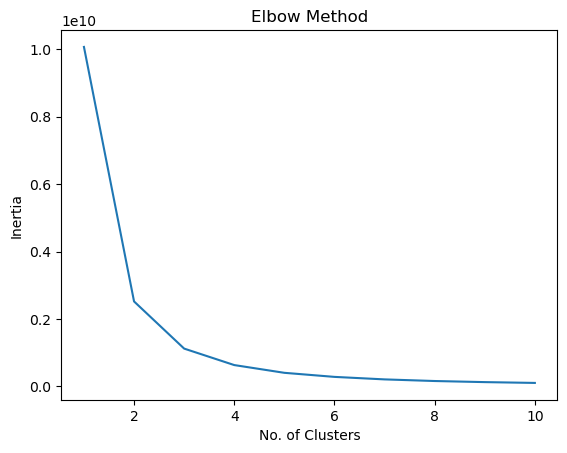

In [55]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)  # Ini adalah baris yang menyebabkan kesalahan
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Lumm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lumm\AppData\Local\Temp\ipykernel_11448\1699427778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = km.labels_


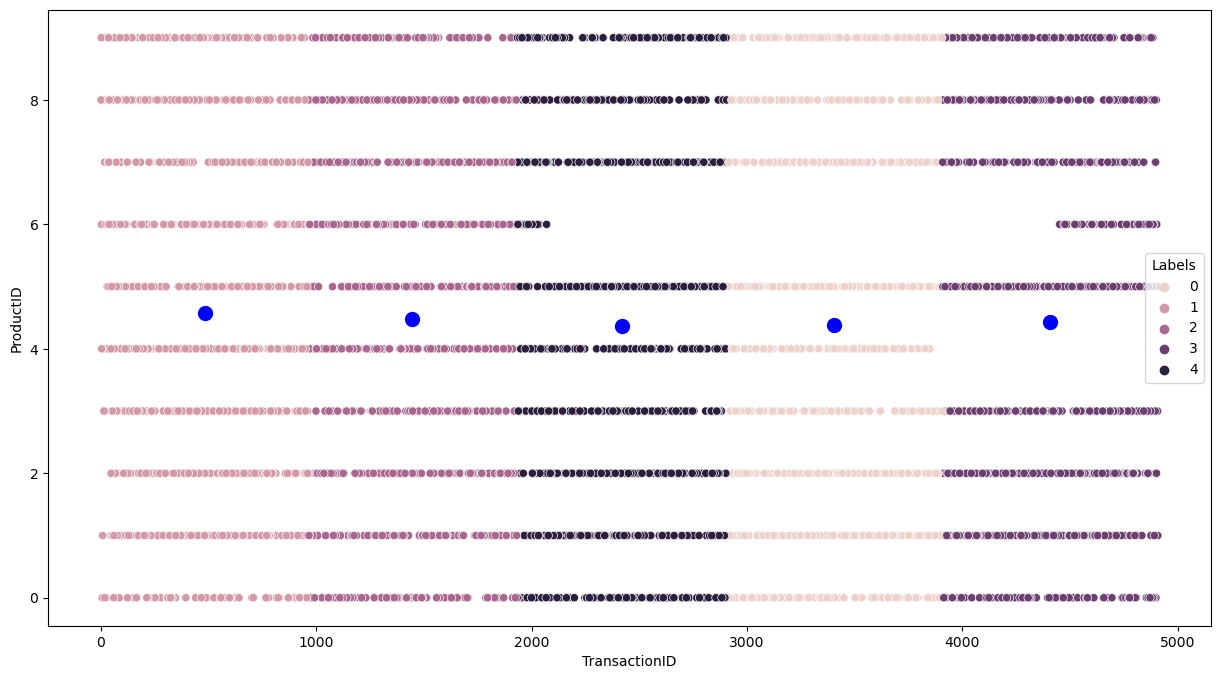

In [58]:
km = KMeans(n_clusters=5, init='k-means++', random_state=0)
km.fit(X)
centroids = km.cluster_centers_
X['Labels'] = km.labels_

plt.figure(figsize=(15, 8))
sns.scatterplot(x=X['TransactionID'], y=X['ProductID'], hue=X['Labels'])

plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=100)
plt.show()

In [59]:
from sklearn.metrics import silhouette_score

pred = km.fit_predict(X)
shil_avg = silhouette_score(X, pred)
print('Nilai Rata - Rata Silhouette : '+str(shil_avg))

C:\Users\Lumm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Nilai Rata - Rata Silhouette : 0.56216501572411


In [60]:
X['Labels']

0       1
1       3
2       1
3       0
4       0
       ..
5015    2
5016    1
5017    3
5018    2
5019    2
Name: Labels, Length: 5020, dtype: int32

In [61]:
print(X.sort_values(by='Labels'))

      TransactionID  ProductID  Labels
3831           3446          4       0
709            3685          0       0
1967           2918          5       0
1425           3103          7       0
4364           3713          1       0
...             ...        ...     ...
3781           2527          4       4
1342           2220          7       4
1347           2709          7       4
3774           2431          4       4
1332           2123          7       4

[5020 rows x 3 columns]
